### 딥러닝 알고리즘
- tensorflow + keras 
- tensorflow : 딥러닝을 수행할 수 있는 라이브러리
- keras : tensorflow 프로그래밍을 쉽게 할 수 있도록 만든 라이브러리.
- pytorch + pytorch lightning
- pytorch : 딥러닝을 수행할 수 있는 라이브러리
- pytorch lightning : pytorch 프로그래밍을 쉽게 할 수 있도록 만든 라이브러리

### tensorflow 설치
- anaconda prompt 에서 pip install tensorflow

In [18]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 불필요한 경고가 뜨지 않게..
import warnings
warnings.filterwarnings('ignore')

# 데이터 전처리 알고리즘 (비지도 학습)
# 문자열 데이터를 숫자로 변환한다.
from sklearn.preprocessing import LabelEncoder
# 표준편차를 기반으로 표준화 한다.
# 잘못된 학습을 정상화 시키는 목적으로 사용한다.
from sklearn.preprocessing import StandardScaler

# 데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split
# 교차 검증
from sklearn.model_selection import cross_val_score

# 평가 함수
# 정확도 평가 함수
from sklearn.metrics import accuracy_score
# mse 평가 함수
from sklearn.metrics import mean_squared_error

# 학습 알고리즘 - 분류
# 최 근접 이웃
# 학습시 : 주어진 데이터를 저장만 한다.
# 예측 : 주변의 데이터를 보고 가장 많은 결과로 결정한다.
from sklearn.neighbors import KNeighborsClassifier
# 선형
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 트리
# 학습시 : 주어진 데이터를 가지고 질문들을 생성한다.
# 예측시 : 질문을 통해 최종 결과를 예측한다.
from sklearn.tree import DecisionTreeClassifier
# 앙상블 - 다수의 알고리즘이 던지는 결과를 취합하여 최종 결과를 결정한다.
# 트리들을 사용한다.
# 학습시 - 데이터를 랜덤하게 섞어서 80%를 추출한다.
# 이렇게 추출된 데이터를 트리의 개수만큼 생성하여 각 트리들에게 주고
# 학습을 수행한다.
# 예측시 - 각 트리가 던지는 결과를 취합하여 다수결의 원칙으로 최종 결과를
# 결정한다.
from sklearn.ensemble import RandomForestClassifier
# 부스팅
# 앙상블 알고리즘이 잘못 예측한 데이터를 다시 학습하는 방식
# 학습과 예측 원리를 앙상블과 동일하다.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 학습 알고리즘 - 회귀
# 최 근접 이웃
from sklearn.neighbors import KNeighborsRegressor
# 선형
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
# 트리
from sklearn.tree import DecisionTreeRegressor
# 앙상블
from sklearn.ensemble import RandomForestRegressor
# 부스팅
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 딥러닝
import tensorflow as tf

# 딥러닝 모델의 각 층을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형회귀를 수행하는 은닉층
from tensorflow.keras.layers import Dense
# 활성화 함수를 관리하는 것
from tensorflow.keras.layers import Activation

# 조기중단
from tensorflow.keras.callbacks import EarlyStopping

# 성능이 개선되면 모델을 파일로 자동 저장한다
from tensorflow.keras.callbacks import ModelCheckpoint

# 저장된 딥러닝모델 불러오기 .h5파일
from tensorflow.keras.models import load_model

### 데이터를 불러온다.

In [2]:
df1 = pd.read_csv('data/breast_cancer.csv')
df1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425,malignant
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952,benign
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091,malignant
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194,benign


### 데이터 전처리

In [3]:
# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

display(X)
display(y)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,25.68,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,12.79,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,21.44,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,13.09,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194


0      malignant
1      malignant
2      malignant
3      malignant
4      malignant
         ...    
449    malignant
450       benign
451    malignant
452       benign
453       benign
Name: target, Length: 454, dtype: object

In [4]:
# 입력데이터 X 의 컬럼 개수를 파악한다.
n_features = X.shape[1]
n_features

30

In [5]:
# 결과 데이터의 종류 수
a1 = y.value_counts()
n_classes = len(a1)
n_classes

2

In [6]:
# 문자 -> 숫자
encoder1 = LabelEncoder()
y = encoder1.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [7]:
# 표준화
# 머신러닝 -> 학습이 정상적으로 이루어지기 위해...
# 딥러닝 -> 학습 속도를 빠르게 하기 위해..
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
X

array([[ 1.0716471 , -2.11021126,  1.24691885, ...,  2.21627442,
         2.57629265,  1.89296305],
       [ 1.80872514, -0.29975355,  1.665741  , ...,  1.02843583,
        -0.29491256,  0.27048275],
       [ 1.55731868,  0.55280299,  1.54548514, ...,  1.88116631,
         1.04374227,  0.19229093],
       ...,
       [ 1.52874976,  1.47150615,  1.4501098 , ...,  0.43900458,
        -1.00379467, -1.25588676],
       [-0.63963097,  2.26281581, -0.66183197, ..., -0.68959168,
        -0.76491536, -0.11396037],
       [ 0.0831626 , -1.22825622,  0.04684827, ..., -0.15491471,
        -0.51828023, -0.32247189]])

In [8]:
# 랜덤을 고정한다.
np.random.seed(1)
tf.random.set_seed(1)

In [9]:
# 모델을 설계한다.
model = Sequential()

# 첫 번째 인닉층은 input_dim 속성을 통해 입력층의 노드를 설정해 준다.
model.add(Dense(40, input_dim=n_features))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('relu'))

# 출력층
# 2진 분류의 경우
# 출력층의 노드의 개수는 1개
# 출력층의 활성화 함수는 sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [10]:
# 모델 컴파일
# loss : 오차를 평가할 함수. 
# 2진 분류 : binary_crossentropy
# optimizer : 경사하강법. adam을 사용한다.
# metircs : 학습 중 평가를 위한 함수. accuracy
model.compile(loss='binary_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

In [11]:
# 학습용과 검증용 데이터로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# 조기 중단
# 검증용 데이터의 손실률을 모니터링 하면서 더이상 개선되지 않는 다고 한다면
# 학습을 중단시킨다.
# patience : 손실률을 몇번을 더 볼것인가를 설정한다. 손실률이 개선되고 여기서
# 정한 학습 횟수만큼 더 진행이 되는 동안에 개선이되지 않는다면 중단한다.
callback1 = EarlyStopping(monitor='val_loss', patience=50)

In [13]:
# 자동저장
# 검증용 데이터의 손실률을 모니터링 하게 하여 개선이 될 경우 저장한다
file_name = '06_model.h5'

# save_best_only : 모니터링하는 순실률의 최하 수치보다 더 개선될때만 저장
# True안넣으면 patience 50번 더 갔을 때 모델로 저장됨
callback2 = ModelCheckpoint(filepath=file_name, monitor = 'val_loss', save_best_only = True)

In [14]:
# 학습한다.
# 첫번째, 두번째 : 학습데이터
# 세번째 : 학습 횟수
# 네번째 : 학습을 위해 사용하는 메모리 공간(ram이나 vram)에 저장하는
# 데이터 양.
# validation_data : 검증용으로 사용할 데이터
# callbacks : 조기중단, 자동저장을 설정한다.
history = model.fit(X_train, y_train, epochs=10000, batch_size=500,
                   validation_data=(X_test, y_test),
                   callbacks=[callback1, callback2])

Epoch 1/10000
1/1 [==============================] - 1s 1s/step - loss: 0.7388 - accuracy: 0.5765 - val_loss: 0.6556 - val_accuracy: 0.6316
Epoch 2/10000
1/1 [==============================] - 0s 95ms/step - loss: 0.7081 - accuracy: 0.5765 - val_loss: 0.6297 - val_accuracy: 0.6404
Epoch 3/10000
1/1 [==============================] - 0s 93ms/step - loss: 0.6792 - accuracy: 0.5824 - val_loss: 0.6052 - val_accuracy: 0.6491
Epoch 4/10000
1/1 [==============================] - 0s 103ms/step - loss: 0.6521 - accuracy: 0.5853 - val_loss: 0.5826 - val_accuracy: 0.6579
Epoch 5/10000
1/1 [==============================] - 0s 112ms/step - loss: 0.6266 - accuracy: 0.6000 - val_loss: 0.5620 - val_accuracy: 0.6754
Epoch 6/10000
1/1 [==============================] - 0s 111ms/step - loss: 0.6027 - accuracy: 0.6176 - val_loss: 0.5425 - val_accuracy: 0.6842
Epoch 7/10000
1/1 [==============================] - 0s 125ms/step - loss: 0.5800 - accuracy: 0.6441 - val_loss: 0.5239 - val_accuracy: 0.6842
Epoc

1/1 [==============================] - 0s 91ms/step - loss: 0.1339 - accuracy: 0.9794 - val_loss: 0.1510 - val_accuracy: 0.9649
Epoch 59/10000
1/1 [==============================] - 0s 94ms/step - loss: 0.1306 - accuracy: 0.9824 - val_loss: 0.1487 - val_accuracy: 0.9649
Epoch 60/10000
1/1 [==============================] - 0s 90ms/step - loss: 0.1274 - accuracy: 0.9824 - val_loss: 0.1466 - val_accuracy: 0.9649
Epoch 61/10000
1/1 [==============================] - 0s 89ms/step - loss: 0.1243 - accuracy: 0.9824 - val_loss: 0.1445 - val_accuracy: 0.9649
Epoch 62/10000
1/1 [==============================] - 0s 96ms/step - loss: 0.1213 - accuracy: 0.9824 - val_loss: 0.1424 - val_accuracy: 0.9649
Epoch 63/10000
1/1 [==============================] - 0s 90ms/step - loss: 0.1184 - accuracy: 0.9853 - val_loss: 0.1404 - val_accuracy: 0.9649
Epoch 64/10000
1/1 [==============================] - 0s 85ms/step - loss: 0.1156 - accuracy: 0.9853 - val_loss: 0.1385 - val_accuracy: 0.9561
Epoch 65/10000

1/1 [==============================] - 0s 95ms/step - loss: 0.0434 - accuracy: 0.9941 - val_loss: 0.1102 - val_accuracy: 0.9561
Epoch 116/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0427 - accuracy: 0.9941 - val_loss: 0.1102 - val_accuracy: 0.9561
Epoch 117/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0420 - accuracy: 0.9941 - val_loss: 0.1102 - val_accuracy: 0.9561
Epoch 118/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0413 - accuracy: 0.9941 - val_loss: 0.1103 - val_accuracy: 0.9561
Epoch 119/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0407 - accuracy: 0.9941 - val_loss: 0.1104 - val_accuracy: 0.9561
Epoch 120/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0400 - accuracy: 0.9941 - val_loss: 0.1105 - val_accuracy: 0.9561
Epoch 121/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0394 - accuracy: 0.9941 - val_loss: 0.1106 - val_accuracy: 0.9561
Epoch 12

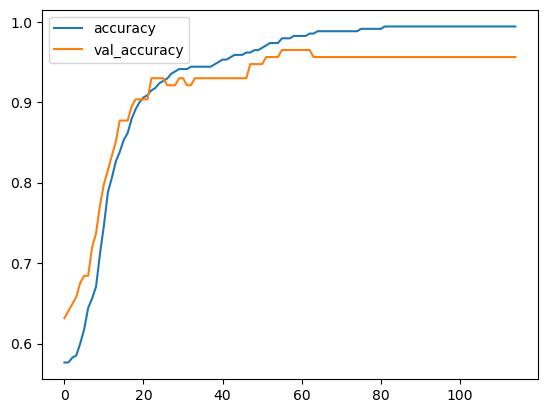

In [15]:
plt.plot(history.history['accuracy'][:-50], label='accuracy')
plt.plot(history.history['val_accuracy'][:-50], label='val_accuracy')
plt.legend()
plt.show()

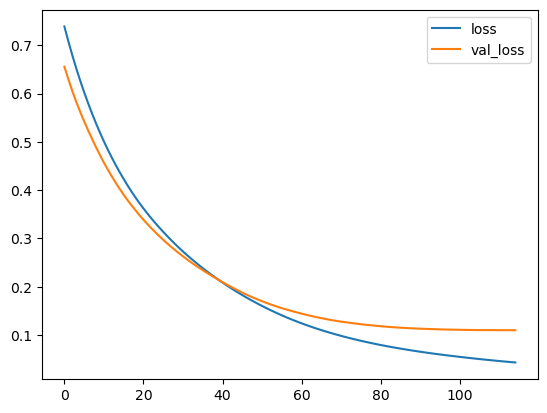

In [16]:
plt.plot(history.history['loss'][:-50], label='loss')
plt.plot(history.history['val_loss'][:-50], label='val_loss')
plt.legend()
plt.show()

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
# 모델을 복원한다
best_model = load_model('06_model.h5')
best_model

In [27]:
# 검증데이터를 가지고 예측한다
pred = best_model.predict(X_test)
pred

4/4 [==============================] - 0s 2ms/step


array([[6.33602613e-04],
       [7.23670721e-02],
       [5.78571148e-02],
       [5.59280568e-04],
       [3.53972078e-04],
       [9.98742521e-01],
       [9.91992712e-01],
       [1.11257087e-03],
       [8.51424469e-04],
       [2.90818010e-02],
       [9.89935994e-01],
       [9.83434916e-01],
       [9.88325953e-01],
       [6.43685520e-01],
       [9.73460734e-01],
       [1.38591728e-04],
       [1.39491510e-06],
       [1.60632953e-02],
       [1.61783106e-03],
       [5.59753999e-02],
       [9.82972085e-01],
       [8.63289897e-05],
       [9.90638196e-01],
       [9.48022842e-01],
       [1.53498882e-02],
       [8.52496829e-04],
       [9.45832551e-01],
       [9.93780851e-01],
       [4.53311571e-07],
       [9.48066056e-01],
       [2.02891199e-04],
       [9.40102339e-01],
       [1.05764411e-05],
       [6.50921417e-03],
       [3.41308216e-04],
       [7.78359622e-02],
       [9.92796838e-01],
       [9.98564720e-01],
       [7.93981424e-04],
       [9.32485282e-01],


In [29]:
# 결과를 환산하고 평가한다
y = (pred>= 0.5).astype('int')
y = y.reshape(-1) # 1차원으로 만듦

r1 = accuracy_score(y_test, y)
r1 # 예측 정확도가 0.95임 테스트 데이터의 0.95의 정확도를 기준으로
# 미래데이터 정확도랑 비교하면서 해보기

0.956140350877193

### 예측한다

In [19]:
# 데이터 불러온다
df2 = pd.read_csv('data/breast_cancer_new.csv')
df2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,14.340,22.15,91.62,633.5,0.12250,0.15170,0.18870,0.09851,0.3270,0.07330
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.050,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,13.120,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.340,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
111,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
112,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
113,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400


In [20]:
# 표준화
X = scaler1.transform(df2)
X

array([[-0.46250369, -0.45164581, -0.50218195, ..., -0.28043066,
         0.5116929 , -0.5831113 ],
       [-0.24537993,  2.87283471, -0.26498762, ..., -0.59279929,
        -1.15425761, -0.39577673],
       [-0.74533596,  2.52250257, -0.7406203 , ..., -0.7316298 ,
        -0.08705654, -0.64284116],
       ...,
       [ 0.67453917,  2.22606768,  0.64563954, ...,  0.3671957 ,
        -1.12013199, -0.31704191],
       [ 1.81729582,  2.53230207,  1.96430728, ...,  2.21029035,
         1.77899418,  2.16989242],
       [-1.85095302,  1.3588119 , -1.85817047, ..., -1.75415837,
        -0.10722167, -0.74112394]])

In [21]:
# 저장된 모델을 복원한다.
best_model = load_model('06_model.h5')
best_model


In [22]:
# 예측한다.
pred = best_model.predict(X)
pred
# 반환값이 2차원 행렬임

4/4 [==============================] - 0s 2ms/step


array([[3.89471155e-04],
       [5.46551168e-01],
       [2.29010835e-01],
       [1.39564663e-01],
       [7.73034766e-02],
       [9.46181826e-04],
       [9.75686014e-01],
       [9.99999285e-01],
       [2.02318281e-02],
       [4.04317281e-04],
       [9.22040734e-03],
       [1.57139581e-02],
       [1.19507290e-01],
       [1.45548722e-04],
       [9.81598973e-01],
       [2.50918090e-01],
       [2.82552704e-04],
       [5.16435206e-01],
       [9.03790444e-03],
       [2.43248474e-02],
       [1.77029346e-04],
       [5.87162329e-04],
       [1.01700671e-01],
       [2.12892628e-04],
       [3.95622163e-04],
       [9.68556583e-01],
       [4.42672195e-03],
       [4.13426310e-02],
       [9.15294141e-03],
       [7.87824951e-03],
       [3.54208320e-01],
       [1.92229524e-02],
       [6.77076653e-02],
       [9.95713592e-01],
       [5.60872769e-03],
       [3.20740998e-01],
       [2.77345181e-02],
       [5.28972149e-01],
       [9.44073915e-01],
       [1.25170145e-05],


In [23]:
# 값 환산
# 0.5 이상은 1, 미만은 0으로 환산한다.
y = (pred >= 0.5).astype('int')
y = y.reshape(-1)
y

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0])

In [24]:
# 문자열로 변환
result = encoder1.inverse_transform(y)
# 저장한다
df2['target'] = result
df2.to_csv('data/breast_cancer_dl.csv')